In [1]:
# import os
# import sys
import warnings; warnings.filterwarnings('ignore')
# sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import geomstats.backend as gsb

gsb.random.seed(2020)

INFO: Using numpy backend


In [3]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.image as snap
import matplotlib.patches as patches

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

In [4]:
from geomstats.geometry.euclidean import Euclidean

dim = 2
n_samples = 2

euclidean = Euclidean(dim=dim)
points_in_linear_space = euclidean.random_point(n_samples=n_samples)
print("Points in linear space:\n", points_in_linear_space)

print()

linear_mean = gsb.sum(points_in_linear_space, axis=0) / n_samples
print("Mean of points:\n", linear_mean)

Points in linear space:
 [[ 0.97255366  0.74678389]
 [ 0.01949105 -0.45632857]]

Mean of points:
 [0.49602235 0.14522766]


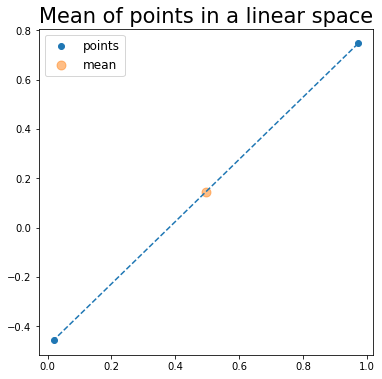

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.scatter(points_in_linear_space[:, 0], points_in_linear_space[:, 1], label="points")
ax.plot(points_in_linear_space[:, 0], points_in_linear_space[:, 1], linestyle="dashed")

ax.scatter(
    gsb.to_numpy(linear_mean[0]),
    gsb.to_numpy(linear_mean[1]),
    label="mean",
    s=80,
    alpha=0.50,
)

ax.set_title("Mean of points in a linear space")
ax.legend();

In [6]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print("Points in manifold:\n", points_in_manifold)

print()

linear_mean = gsb.sum(points_in_manifold, axis=0) / n_samples
print("Mean of points:\n", linear_mean)

Points in manifold:
 [[-0.71502435 -0.41197257 -0.56481748]
 [-0.997575   -0.04788171  0.05051201]]

Mean of points:
 [-0.85629967 -0.22992714 -0.25715273]


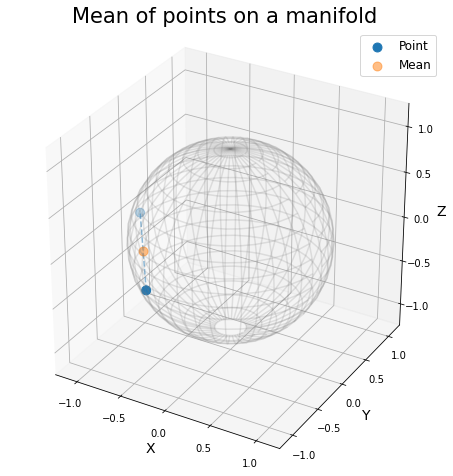

In [7]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

visualization.plot(points_in_manifold, ax=ax, space="S2", label="Point", s=80)

ax.plot(
    points_in_manifold[:, 0],
    points_in_manifold[:, 1],
    points_in_manifold[:, 2],
    linestyle="dashed",
    alpha=0.5,
)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], label="Mean", s=80, alpha=0.5
)

ax.set_title("Mean of points on a manifold")
ax.legend();

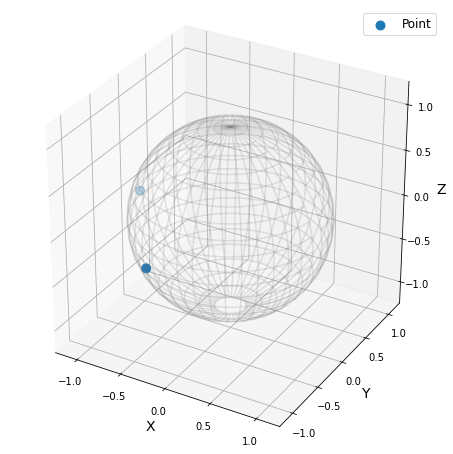

In [8]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

visualization.plot(points_in_manifold, ax=ax, space="S2", label="Point", s=80)

# ax.set_title("Mean of points on a manifold")
ax.legend();

Text(0.5, 0.5, 'R=2, C=4, N=8')

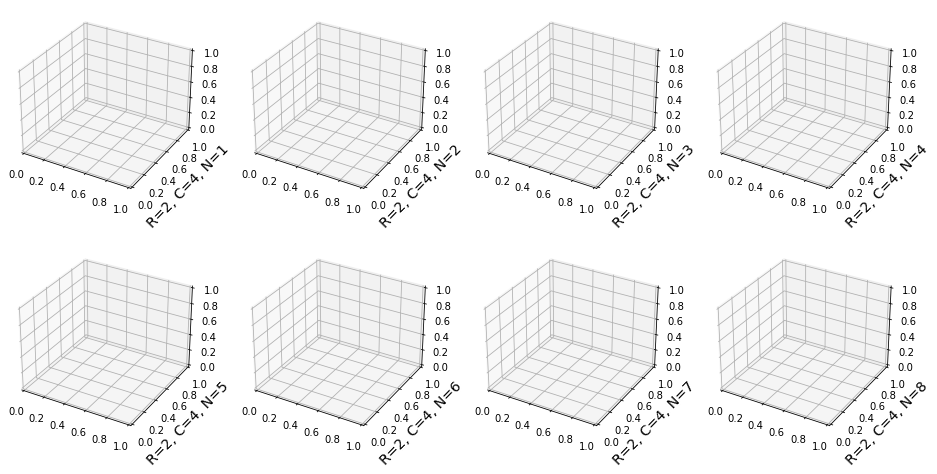

In [9]:
# Dummy Plot with row and column:
%matplotlib inline

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(241, projection="3d")
ax2 = fig.add_subplot(242, projection="3d")
ax3 = fig.add_subplot(243, projection="3d")
ax4 = fig.add_subplot(244, projection="3d")
ax5 = fig.add_subplot(245, projection="3d")
ax6 = fig.add_subplot(246, projection="3d")
ax7 = fig.add_subplot(247, projection="3d")
ax8 = fig.add_subplot(248, projection="3d")

ax1.set_ylabel('R=2, C=4, N=1')
ax2.set_ylabel('R=2, C=4, N=2')
ax3.set_ylabel('R=2, C=4, N=3')
ax4.set_ylabel('R=2, C=4, N=4')
ax5.set_ylabel('R=2, C=4, N=5')
ax6.set_ylabel('R=2, C=4, N=6')
ax7.set_ylabel('R=2, C=4, N=7')
ax8.set_ylabel('R=2, C=4, N=8')

In [10]:
print(sphere.belongs(linear_mean))

False


In [11]:
import geomstats.datasets.utils as data_utils

INFO: NumExpr defaulting to 4 threads.


In [12]:
data, names = data_utils.load_cities()
print(names[:5])
print(data[:5])

['Tokyo', 'New York', 'Mexico City', 'Mumbai', 'São Paulo']
[[ 0.61993792 -0.52479018  0.58332859]
 [-0.20994315  0.7285533   0.65202298]
 [ 0.14964311  0.93102728  0.33285904]
 [-0.27867026 -0.9034188   0.32584868]
 [-0.62952884  0.6662902  -0.3996884 ]]


In [16]:
gsb.all(sphere.belongs(data))

False

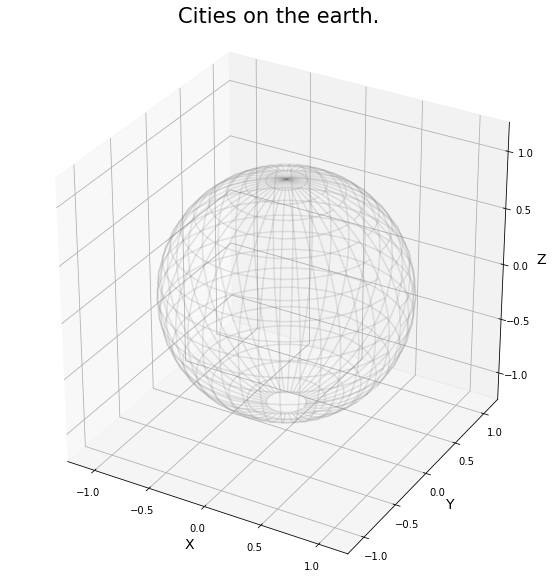

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

visualization.plot(data[15:20], ax=ax, space="S2", label=names[15:20], s=80, alpha=0.5)

ax.set_title("Cities on the earth.");

In [19]:
import os

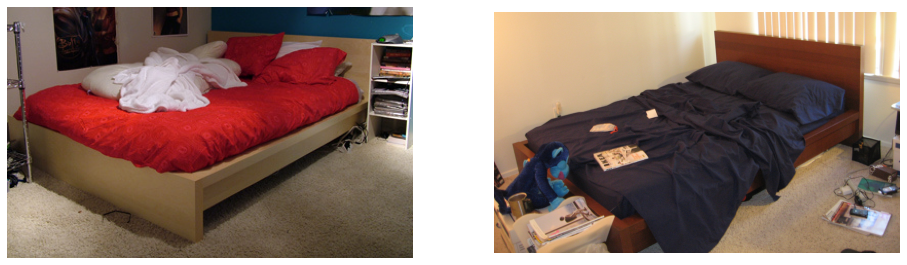

In [21]:
data, img_paths = data_utils.load_poses()

img_path1, img_path2 = img_paths[0], img_paths[1]
img_path1 = os.path.join(data_utils.DATA_PATH, "poses", img_path1)
img_path2 = os.path.join(data_utils.DATA_PATH, "poses", img_path2)

img1 = snap.imread(img_path1)
img2 = snap.imread(img_path2)

fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121)
imgplot = ax.imshow(img1)
ax.axis("off")
ax = fig.add_subplot(122)
imgplot = ax.imshow(img2)
ax.axis("off")

plt.show()

In [22]:
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

so3 = SpecialOrthogonal(n=3, point_type="vector")

In [24]:
gsb.all(so3.belongs(data))


True

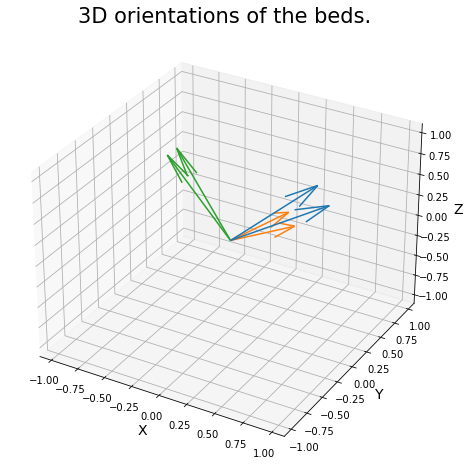

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

visualization.plot(data[:2], ax=ax, space="SO3_GROUP")

ax.set_title("3D orientations of the beds.");

In [26]:
karate_graph = data_utils.load_karate_graph()


In [27]:
from geomstats.datasets.prepare_graph_data import HyperbolicEmbedding

hyperbolic_embedding = HyperbolicEmbedding(max_epochs=20)
embeddings = hyperbolic_embedding.embed(karate_graph)


INFO: Number of edges: 34
INFO: Mean vertices by edges: 4.588235294117647
INFO: iteration 0 loss_value 1.743506
INFO: iteration 1 loss_value 1.670282
INFO: iteration 2 loss_value 1.622862
INFO: iteration 3 loss_value 1.581109
INFO: iteration 4 loss_value 1.524303
INFO: iteration 5 loss_value 1.457299
INFO: iteration 6 loss_value 1.423018
INFO: iteration 7 loss_value 1.471213
INFO: iteration 8 loss_value 1.414582
INFO: iteration 9 loss_value 1.411381
INFO: iteration 10 loss_value 1.346711
INFO: iteration 11 loss_value 1.322608
INFO: iteration 12 loss_value 1.359038
INFO: iteration 13 loss_value 1.331056
INFO: iteration 14 loss_value 1.354354
INFO: iteration 15 loss_value 1.338090
INFO: iteration 16 loss_value 1.361053
INFO: iteration 17 loss_value 1.324803
INFO: iteration 18 loss_value 1.289605
INFO: iteration 19 loss_value 1.307014


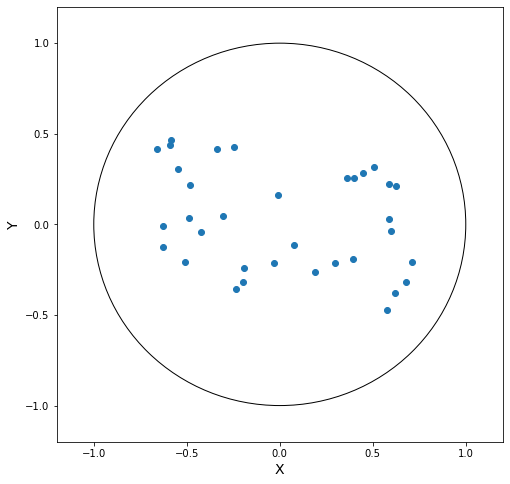

In [29]:
disk = visualization.PoincareDisk(point_type="ball")
fig, ax = plt.subplots(figsize=(8, 8))
disk.set_ax(ax)
disk.draw(ax=ax)
ax.scatter(embeddings[:, 0], embeddings[:, 1]);

In [30]:
data, patient_ids, labels = data_utils.load_connectomes()


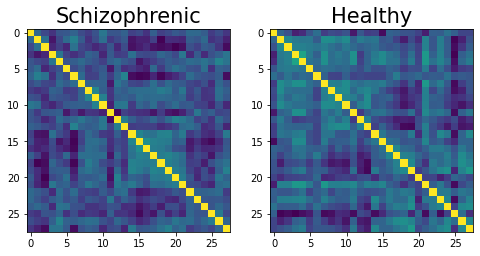

In [31]:
labels_str = ["Healthy", "Schizophrenic"]

fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
imgplot = ax.imshow(data[0])
ax.set_title(labels_str[labels[0]])

ax = fig.add_subplot(122)
imgplot = ax.imshow(data[1])
ax.set_title(labels_str[labels[1]])

plt.show()

In [32]:
import geomstats.geometry.spd_matrices as spd

manifold = spd.SPDMatrices(28)

In [34]:
gsb.all(manifold.belongs(data))


True

In [35]:
nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)
print(labels)
print(monkeys)

(22, 5, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


In [36]:
two_nerves = nerves[monkeys == 0]
print(two_nerves.shape)

two_labels = labels[monkeys == 0]
print(two_labels)

(2, 5, 3)
[0 1]


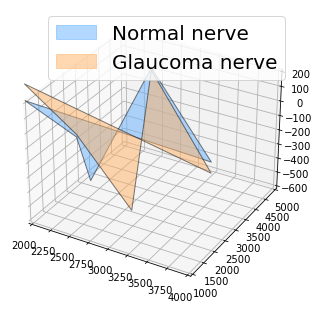

In [38]:
label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = patches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = patches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20})
plt.show()

In [39]:
cells, cell_lines, treatments = data_utils.load_cells()

In [41]:
from geomstats.geometry.discrete_curves import DiscreteCurves
from geomstats.geometry.euclidean import Euclidean

r2 = Euclidean(2)

planar_curves_space = DiscreteCurves(r2)

result = planar_curves_space.belongs(cells)
gsb.all(result)

True

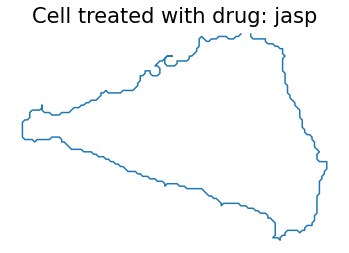

In [42]:
cell_id = 500
cell = cells[cell_id]

plt.plot(cell[:, 0], cell[:, 1])
plt.axis("equal")
plt.title(f"Cell treated with drug: {treatments[cell_id]}")
plt.axis("off");